In [105]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from nltk import ngrams
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import nltk, re, string
import collections
import seaborn as sb

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read scrapped speeches saved in csv foramt

df = pd.read_csv('JFK_speech_nlp.csv')
df.head()

,scrap_date,article_title,article_link,speech_date,speech_title,speech,speech_year,speech_month,cleanedup_words,positive_count,positive_pct,negative_count,negative_pct
0,2020-11-18,Remarks of John F. Kennedy at an Induction Cer...,https://www.jfklibrary.org//archives/other-res...,"July 4, 1942",FOR WHAT WE FIGHT,A number of years ago in a room in Philadelphi...,1942,7,"['number', 'year', 'ago', 'room', 'philadelphi...",44.0,0.897959,5.0,0.102041
1,2020-11-18,"Remarks of John F. Kennedy, United War Fund Ap...",https://www.jfklibrary.org//archives/other-res...,"October 8, 1945",NaN,These are the most critical days of our years....,1945,10,"['critical', 'day', 'year', 'end', 'world', 'w...",89.0,0.908163,9.0,0.091837
2,2020-11-18,Remarks of John F. Kennedy at the Crosscup-Pis...,https://www.jfklibrary.org//archives/other-res...,"November 11, 1945",NaN,Our foreign policy today may well determine th...,1945,11,"['foreign', 'policy', 'today', 'may', 'well', ...",126.0,0.926471,10.0,0.073529
3,2020-11-18,Remarks of John F. Kennedy at a Meeting of the...,https://www.jfklibrary.org//archives/other-res...,"April 15, 1946",Public Responsibility for the Veteran,It is a great honor and pleasure for me to be ...,1946,4,"['great', 'honor', 'pleasure', 'morning', 'gra...",72.0,0.888889,9.0,0.111111
4,2020-11-18,Remarks of John F. Kennedy on Radio Station WN...,https://www.jfklibrary.org//archives/other-res...,"May 16, 1946",THE VETERAN,Ladies and Gentlemen of the Radio Audience:I t...,1946,5,"['lady', 'gentleman', 'radio', 'audience', 'ta...",45.0,0.803571,11.0,0.196429


In [116]:
x = df.query("speech_date == 'April 27, 1961'")['speech']
x = ' '.join(x.tolist())
x = x.lower()
x = x.translate(str.maketrans('', '', string.punctuation))
tokenized = x.split()

counter = collections.Counter(tokenized)

esBigrams = ngrams(tokenized, 2)
esBigramFreq = collections.Counter(esBigrams)
esBigramFreq[('secret', 'war')], counter['secret']

(1, 7)

In [113]:
for i in range(df.shape[0]):
    if isinstance(df['speech'][i], str):
        x = df['speech'][i].lower()
        x = x.translate(str.maketrans('', '', string.punctuation))
        tokenized = x.split()
    else:
        x = ' '.join(df['speech'][i].tolist())
        x = x.lower()
        x = x.translate(str.maketrans('', '', string.punctuation))
        tokenized = x.split()
    
    counter = collections.Counter(tokenized)
    
    esBigrams = ngrams(tokenized, 2)
    esBigramFreq = collections.Counter(esBigrams)
    
    esTrigrams = ngrams(tokenized, 3)
    esTrigramFreq = collections.Counter(esTrigrams)
    
    df.at[i, 'freedom_of_speech'] = esTrigramFreq[('freedom', 'of', 'speech')]
    df.at[i, 'free_will'] = esBigramFreq[('free', 'will')]
    df.at[i, 'secret_society'] = esBigramFreq[('secret', 'societies')] + esBigramFreq[('secret', 'society')]
    df.at[i, 'speech_count'] = counter['speech'] + counter['speeches']
    df.at[i, 'threat_count'] = counter['threat'] + counter['threats']
    df.at[i, 'war_count'] = counter['war'] + counter['wars']
    df.at[i, 'censor_count'] = counter['censor'] + counter['censorship']
    df.at[i, 'conspiracy_count'] = counter['conspiracy'] + counter['conspiracies']
    df.at[i, 'invasion_count'] = counter['invasion'] + counter['invasions']
    df.at[i, 'fear_count'] = counter['fear'] + counter['fears']
    df.at[i, 'news_count'] = counter['news']

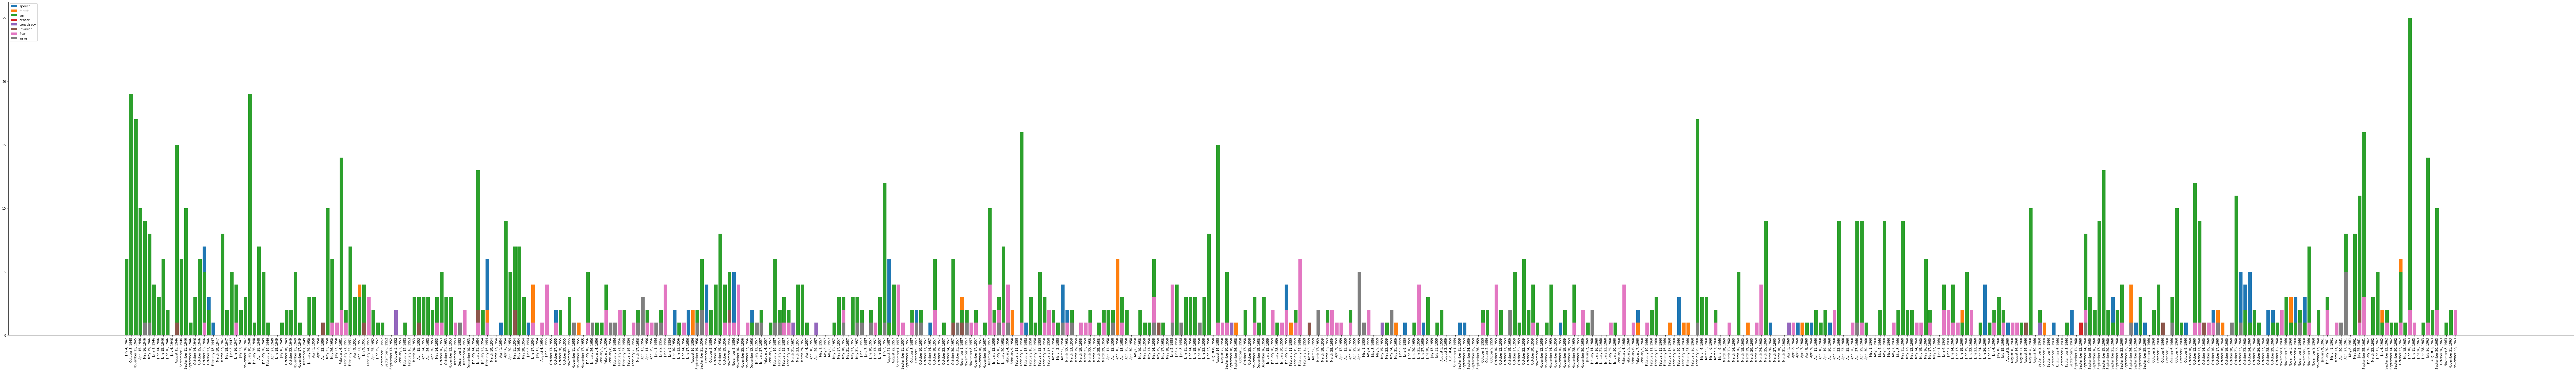

In [114]:
# plot count of positive & negative sentences per speech

plt.figure(figsize=(150, 20))

#plt.bar(df['speech_date'], df['speech_count'],  label="speech")
plt.bar(df['speech_date'], df['threat_count'],  label="threat")
plt.bar(df['speech_date'], df['war_count'],  label="war")
plt.bar(df['speech_date'], df['censor_count'],  label="censor")
plt.bar(df['speech_date'], df['conspiracy_count'], label="conspiracy")
plt.bar(df['speech_date'], df['invasion_count'],  label="invasion")

plt.bar(df['speech_date'], df['fear_count'],  label="fear")
plt.bar(df['speech_date'], df['news_count'],  label="news")

plt.legend(loc="upper left")

plt.xticks(rotation=90);
plt.show();

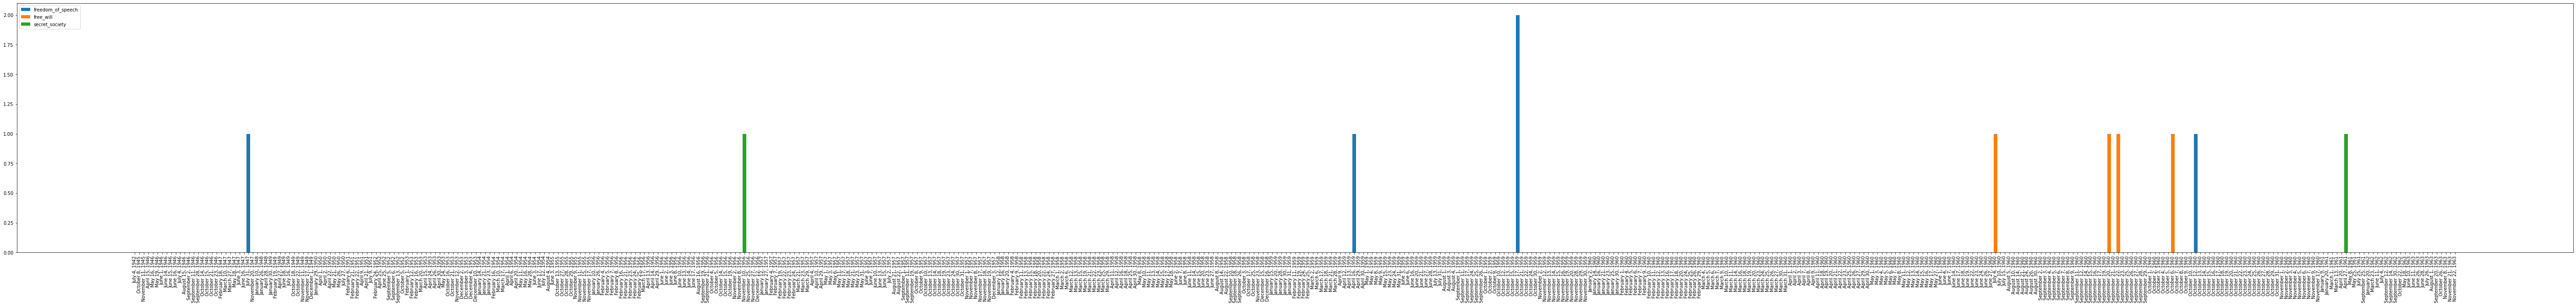

In [117]:
# plot count of positive & negative sentences per speech

plt.figure(figsize=(100, 10))

plt.bar(df['speech_date'], df['freedom_of_speech'],  label="freedom_of_speech")
plt.bar(df['speech_date'], df['free_will'],  label="free_will")
plt.bar(df['speech_date'], df['secret_society'], label="secret_society")

plt.legend(loc="upper left")

plt.xticks(rotation=90);
plt.show();